# Neural Network for Pattern Recognition

### Useful links: 
#### Neural network tutorial
- https://beckernick.github.io/neural-network-scratch/

#### Softmax and cross entropy loss
- https://deepnotes.io/softmax-crossentropy
- http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy
- https://stackoverflow.com/questions/40575841/numpy-calculate-the-derivative-of-the-softmax-function

#### Backpropagation (General)
- http://neuralnetworksanddeeplearning.com/chap2.html
- http://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html

#### Backpropagation (with softmax and cross entropy)
- https://www.coursera.org/learn/deep-neural-network/lecture/LCsCH/training-a-softmax-classifier

## Imports

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## Generate random data

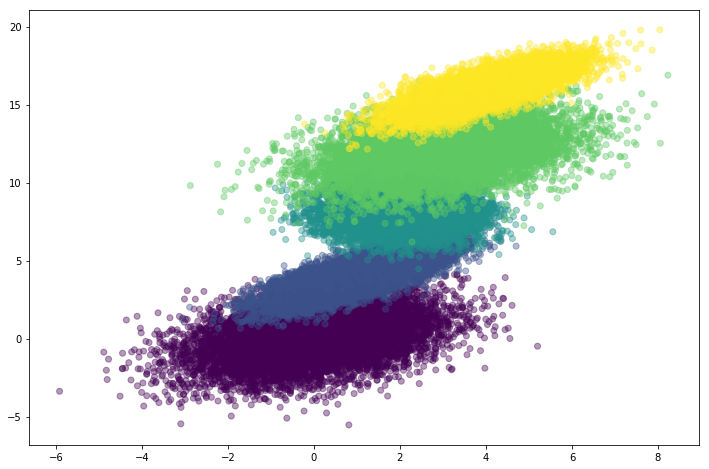

In [2]:
np.random.seed(12)
num_observations = 10000

x1 = np.random.multivariate_normal([0, 0], [[2, .75],[.75, 2]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
x3 = np.random.multivariate_normal([2, 8], [[0, .75],[.75, 0]], num_observations)
x4 = np.random.multivariate_normal([3, 12], [[2, .75],[.75, 2]], num_observations)
x5 = np.random.multivariate_normal([4, 16], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2, x3, x4, x5)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations), np.ones(num_observations) + 1, np.ones(num_observations) + 2, np.ones(num_observations) + 3))

plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

## Split into train an test data

In [3]:
labels_onehot = np.zeros((simulated_labels.shape[0], 5)).astype(int)
labels_onehot[np.arange(len(simulated_labels)), simulated_labels.astype(int)] = 1

train_dataset, test_dataset, \
train_labels, test_labels = train_test_split(
    simulated_separableish_features, labels_onehot, test_size = .1, random_state = 12)

## Relu activation

In [4]:
def relu(data_array):
    return np.maximum(data_array, 0)

## Softmax function used as activation in the output layer

In [5]:
def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps, axis = 1, keepdims = True)


## Cross entropy loss

In [6]:
def cross_entropy(output, labels):
    # Output is the activation of the last layer (softmax already applied)
    logs = np.log(output)
    return np.divide(-1.0 * np.sum(np.multiply(labels, logs)), labels.shape[0])

# Neural Network
The network architecture will consist of an input layer of 2 features (x and y), a hidden layer with 7 units, and an output layer with 5 units since there are 5 possible classes.

## Weight initialization

In [7]:
def initializeWeights(inputDim, hiddenDim, outputDim):
    # Weights and bias weights from input layer to hidden layer
    W1 = np.random.randn(inputDim, hiddenDim) / np.sqrt(inputDim)
    b1 = np.zeros((1, hiddenDim))

    # Weights and bias weights from hidden layer to output layer
    W2 = np.random.randn(hiddenDim, outputDim) / np.sqrt(hiddenDim)
    b2 = np.zeros((1, outputDim))
    
    return W1, W2, b1, b2

## Training

In [8]:
iterations = 5001
learningRate = 0.05
inputDim = train_dataset.shape[1]
hiddenDim = 7
outputDim = train_labels.shape[1]
W1, W2, b1, b2 = initializeWeights(inputDim, hiddenDim, outputDim)
numExamples = train_dataset.shape[0]

for i in range(iterations):
    # Forward propagation
    # Input layer to hidden layer
    net_hidden = np.dot(train_dataset, W1) + b1
    activation_hidden = relu(net_hidden)
    
    # Hidden layer to output layer
    net_out = np.dot(activation_hidden, W2) + b2
    activation_out = softmax(net_out)
    
    # Backpropagation
    
    # BP1 con softmax y cross entropy se reduce a esto (matemagics)
    delta_out = activation_out - train_labels
    
    # Siguiendo BP2, debería hacerse un producto Haddamard entre el producto punto de delta_out con W2
    # y la derivada de ReLu, pero como la derivada de ReLu es 0 para 0 y valores negativos, y 1 para
    # valores positivos, solo hacemos 0 donde en la activación haya 0 o valores negativos
    delta_hidden = np.dot(delta_out, W2.T)
    delta_hidden[activation_hidden <= 0] = 0
    
    dW2 = np.divide(np.dot(activation_hidden.T, delta_out), numExamples)
    dW1 = np.divide(np.dot(train_dataset.T, delta_hidden), numExamples)
    db2 = np.divide(np.sum(delta_out, axis = 0), numExamples)
    db1 = np.divide(np.sum(delta_hidden, axis = 0), numExamples)
    
    # Update weights and bias
    W2 -= learningRate * dW2
    W1 -= learningRate * dW1
    b2 -= learningRate * db2
    b1 -= learningRate * db1
    
    if i % 500 == 0:
        print('Loss after iteration ' + repr(i) + ': ' + repr(cross_entropy(activation_out, train_labels)))    

Loss after iteration 0: 3.728775085802118
Loss after iteration 500: 0.71071677444572945
Loss after iteration 1000: 0.49190425438908902
Loss after iteration 1500: 0.40043807632118544
Loss after iteration 2000: 0.35176441211246195
Loss after iteration 2500: 0.31595589198903296
Loss after iteration 3000: 0.28436916457030859
Loss after iteration 3500: 0.26386592245320667
Loss after iteration 4000: 0.24909754176347929
Loss after iteration 4500: 0.23675674435095509
Loss after iteration 5000: 0.226730435091692


## Accuracy with test dataset

In [9]:
net_hidden = np.dot(test_dataset, W1) + b1
activation_hidden = relu(net_hidden)
net_out = np.dot(activation_hidden, W2) + b2
activation_out = softmax(net_out)

predictions = np.argmax(activation_out, 1)
real_labels = np.argmax(test_labels, 1)
correct = 0
for i in range(len(predictions)):
    if predictions[i] == real_labels[i]:
        correct = correct + 1
accuracy = (float(correct) / float(len(predictions))) * 100
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 93.10000000000001%
